# Basic Statistics

G. Richards
(2016, 2018, 2020, 2022)

Resources for this material include Ivezic Sections 1.2, 3.0-3.2, Karen' Leighly's [Bayesian Statistics Lecture](http://seminar.ouml.org/lectures/bayesian-statistics/), [Jo Bovy's 2016 class](http://astro.utoronto.ca/%7Ebovy/teaching.html), specifically Lecture 1, and David Hogg's: ["Data analysis recipes: Probability calculus for inference"](https://arxiv.org/abs/1205.4446).  With updates to my own class from [Stephen Taylor's class at Vanderbilt](https://github.com/VanderbiltAstronomy/astr_8070_s22).

Last time we worked through some examples of the kinds of things that we will be doing later in the course.  But before we can do the fun stuff, we need to lay some statistical groundwork.  Some of you may have encountered some of this material in Math 311.

## Contents
* [Preliminaries and Notation](#one)
* [Descriptive Statistics](#two)
* [Probability](#three)
* [Bayes' Theorem](#four)
* [Bayes' Theorem Examples: Legos and Monty Hall](#five)
* [Contingency Tables](#six)
* [Models and Data](#seven)

## Preliminaries and Notation <a class="anchor" id="one"></a>

Before getting started today, we first need to go over some of the notation that the book uses.   

* $x$ is a scalar quantity, measured $N$ times

* $x_i$ is a single measurement with $i=1,...,N$

* $\{x_i\}$ refers to the set of *all* N measurements

Our data can be real numbers, discrete labels (strings or numbers), or even "missing values" (we sometimes pad our datasets with NaNs in this case). 

**Goal of data mining & statistical inference:**
> We are generally trying to *estimate* $h(x)$, the *true* generating distribution from which $\{x_i\}$ are drawn.

* We will refer to $h(x)$ as the **probability density (distribution) function** or the **pdf** and $h(x)dx$ is the propobability of a value lying between $x$ and $x+dx$. A histogram is an example of a pdf.

* While $h(x)$ is the "true" distribution (or **population** pdf), what we *measure* from the data is the ***empirical*** distribution, which is denoted $f(x)$.  So, $f(x)$ is a *model* of $h(x)$.  In principle, with infinite data $f(x) \rightarrow h(x)$, but in reality measurement errors keep this from being strictly true.

* If we are attempting to guess a *model* for $h(x)$, then the process is **parametric**.  With a model solution we can generate new (simulated) data that should mimic what we measure.  

* If we are not attempting to guess a model, then the process is **nonparametic**.  That is we are just trying to describe the data that we see in the most compact manner that we can, but we are not trying to produce mock data.
The histograms that we made last time are an example of a nonparametric method of describing data. 

Let's look at our distribution from last time to see the differences.


Execute this code cell; don't worry about any errors.  But if it doesn't work without error then, you may not have LaTeX installed.  You can ignore the error or you may be able to fix it by changing
```setup_text_plots(fontsize=14, usetex=True)```
to
```setup_text_plots(fontsize=14, usetex=False)```

This cell will start with a generating distribution $h(x)$, draw a number of random samples as data $\{x_i\}$, and then fit these data with a parametric and non-parametric model $f(x)$.

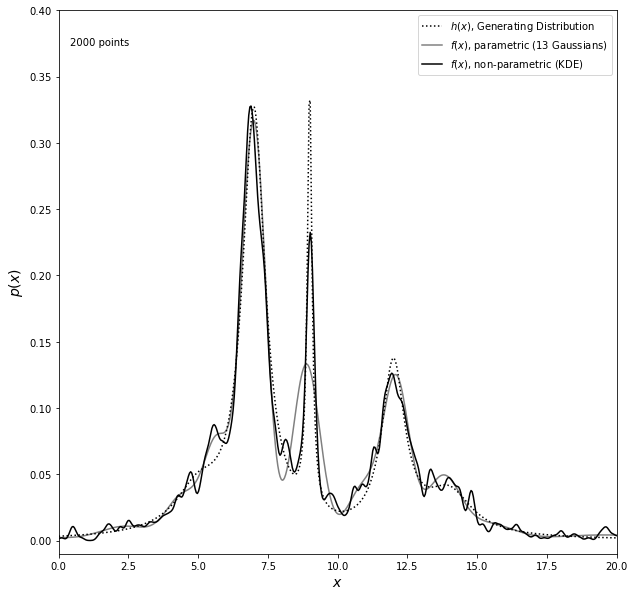

In [1]:
# Execute this cell
# Don't worry about what it is doing
#
# based on Ivezic v2, Figure 6.8, edited by GTR for this notebook
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
#if "setup_text_plots" not in globals():
#    from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=14, usetex=True)

#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
#  this is the same data used in the Bayesian Blocks figure
random_state = np.random.RandomState(seed=0)
N = 2000 # number of data points
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(x)
x = x[x > -10]
x = x[x < 30]

#------------------------------------------------------------
# plot the results
fig,ax = plt.subplots(figsize=(10, 10))

xgrid = np.linspace(-10, 30, 1000)

# Compute density with KDE
kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde.fit(x[:, None])
dens_kde = np.exp(kde.score_samples(xgrid[:, None]))

# Compute density via Gaussian Mixtures using a pre-defined number of clusters (13)
gmm = GaussianMixture(n_components=13).fit(x.reshape(-1, 1))
logprob = gmm.score_samples(xgrid.reshape(-1, 1))
fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1)))

# plot the results
ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
            label="$h(x)$, Generating Distribution")
ax.plot(xgrid, fx(np.array(xgrid)), '-', color='gray',
            label="$f(x)$, parametric (13 Gaussians)")
ax.plot(xgrid, dens_kde, '-', color='black', zorder=3,
            label="$f(x)$, non-parametric (KDE)")

# label the plot
ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)
ax.set_ylabel('$p(x)$',fontsize=14)
ax.legend(loc='upper right')

ax.set_xlabel('$x$',fontsize=14)
ax.set_xlim(0, 20)
ax.set_ylim(-0.01, 0.4001)

plt.show()

If you have a parametric model, you can use the model function to determine $f(7.132)$ directly.  If you have a nonparametric description of the data, you would have to interpolate to get $f(7.132)$.

Technically, the 13 Gaussians aren't truly parametric as the best fit is changing each time, but if I fixed the model it would be.  Nevertheless, it is continuously defined, which is what is important here.

In [2]:
print(hx(7.132))             # h(x), the true distribution
print(fx(np.array([7.132]))) # f(x) for a parametric model

# f(x) for a non-parametric model
# Can't do this without interpolating between bins
print(xgrid[(xgrid>7.05)&(xgrid<7.2)])

#or
print(np.exp(kde.score_samples(np.atleast_2d(7.132)))) # f(x) for non-parametric model

0.3062100869598303
[0.30140265]
[7.05705706 7.0970971  7.13713714 7.17717718]
[0.26087616]


## Goal

We could summarize the goal of the next 2 weeks of this class as an attempt to: 
1. estimate $f(x)$ from some real (possibly multi-dimensional) data set, 
2. find a compact way to describe $f(x)$ and its uncertainty, 
3. compare it to models of $h(x)$, and then 
4. use the knowledge that we have gained in order to interpret new measurements.

## Descriptive Statistics <a class="anchor" id="two"></a>

Our goal is to estimate $h(x)$ given some measured data, allowing us to reconstruct the data-based distribution $f(x)$. An arbitrary distribution can be characterized by **location** parameters (i.e., position), **scale** parameters (i.e., width), and **shape** parameters. These parameters are called ***descriptive statistics***.

For example, let's say that we are trying to characterize the population of asteroids in the Solar System.  Maybe their sizes have a Gaussian distribution (with some characteristic size), or maybe they have a flat distribution (with equal numbers over a large range of sizes).  Or maybe the distribution is a power-law, with lots of little asteroids and very few big ones.  Or maybe it is a power-law in the other direction: very few little ones and lots of big ones.  If you are the first person to discover asteroids, then *you don't know*.  Our job is to figure that out: based entirely on the data.

That leads us to the need for **estimators**.  Since we don't know the distribution, we have to estimate it.  

So, the book spends a lot of time talking about estimators and possible distributions.  

Let's first review some commonly computed statistical properties of a data set.  In the next lecture we'll talk about different kinds of distributions that you may encounter.

In [3]:
# Let's use the distribution that we defined above, but rename it
data = x 

Everyone knows that the **mean** of a sample is just 

$$\mu = \frac{1}{N}\sum_{i=1}^N x_i$$

Except that isn't quite true.  Next week we'll see where this comes from.

The **arithmetic mean** (or Expectation value) is actually defined by

$$\mu = E(x) = \int_{-\infty}^{\infty} x h(x) dx,$$

where $h(x)$ must be properly normalized and the integral gets replaced by a sum for discrete distributions.

Specifically, this is the expecation value of $x$.  If you want the expectation value of something else--say $x^2$ or $(x-\mu)^2$, you replace the $x$ in the integral with that.

We could think about this as sort of the "center of gravity" of your pdf.

Text(0, 0.5, '$h(x)$')

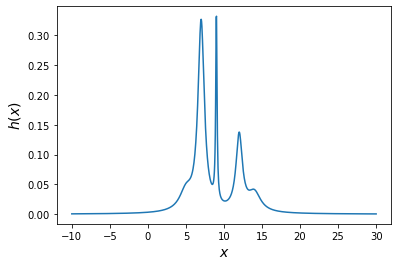

In [4]:
# Think about starting at the leftmost value of x, multiplying that value of x by h(x), 
# then summing up going from left to right.  That is your mean value.

plt.plot(xgrid, hx(xgrid))
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$h(x)$',fontsize=14)

In [5]:
# Execute this cell
mean = np.mean(data)
print(mean)

8.79491032639886


While it is perhaps most common to compute the mean, the **median** is a more *robust* estimator of the (true) mean location of the distribution.  That's because it is less affected by **outliers**.

To understand the previous statement, think about multiplying all numbers above the 50th percentile (i.e. the median) by 100, or even just replacing them with larger numbers. The mean would be strongly affected by these corrupted points, but cumulative statistics based on the ordering of samples would remain unaffected by the outlier corruption.

In [6]:
# Execute this cell.  Think about what it is doing.
median = np.median(data)
mask = data>15
data2 = data.copy()
data2[mask] = 100
newmedian = np.median(data2)
newmean = np.mean(data2)
print(median,newmedian)
print(mean,newmean)

7.752731764708434 7.752731764708434
8.79491032639886 12.185900679666956


<font color='red'>Repeat the above masking investigation, but this time multiply all samples above $15$ by a factor of 10. Do you get a similar effect?</font>

In [7]:
median = np.median(data)
mask = data>15
data3 = data.copy()
data3[mask] = data3[mask]*10
newmedian = np.median(data3)
newmean = np.mean(data3)
print(median,newmedian)
print(mean,newmean)
#similar effect, even more change to mean

7.752731764708434 7.752731764708434
8.79491032639886 15.852371892403502


In addition to the "average" location value, we'd like to know something about **deviations** from the average (which is related to the shape of the distribution).  The simplest thing to compute is $$d_i = x_i - \mu.$$  However, the average deviation is zero by definition of the mean.  The next simplest thing to do is to compute the **mean absolute deviation (MAD)**:
$$\frac{1}{N}\sum|x_i-\mu|,$$
but the absolute values can hide the true scatter of the distribution [in some cases (see footnote)](http://www.mathsisfun.com/data/standard-deviation.html).  So the next simplest thing to do is to square the differences $$\sigma^2 = \frac{1}{N}\sum(x_i-\mu)^2,$$ which we call the **variance**.

The *variance* is just expectation value of $(x-\mu)^2$

$$\sigma^2 = V = \int_{-\infty}^{\infty}  (x-\mu)^2 h(x) dx,$$

where, again,  the integral gets replaced by a sum for discrete distributions.

You may be familiar with this in the context of a Gaussian distribution, but the variance is something that you can compute even if your distribution is not Gaussian.  

And we define the **standard deviation** as
$$\sigma = \sqrt{V}$$

In [8]:
# Execute this cell
var = np.var(data)
std = np.std(data)
print(var,std)

15.026052739760294 3.876345281287555


There is also the **Median Absolute Deviation (also MAD)** given by
$${\rm median} (|x_i-{\rm median}(\{x_i\})|)$$
where $\sigma = 1.4826\,{\rm MAD}$ for a Gaussian distribution (but note that we aren't using a Gaussian distribution above).

In [9]:
from astropy.stats import median_absolute_deviation
MAD = median_absolute_deviation(data)
print(MAD,MAD*1.4826)

1.6811130664731344 2.492418232353069


**Percentiles**, $q_p$, are computed as
$$\frac{p}{100} = \int_{-\infty}^{q_p}h(x) dx$$

The full integral from $-\infty$ to $\infty$ is 1 (100%).  So, here you are looking for the value of x that accounts for $p$ percent of the distribution.

For example, the 25th, 50th, and 75th percentiles:

In [10]:
q25,q50,q75 = np.percentile(data,[25,50,75])
print(q25,q50,q75)

6.674995612577169 7.752731764708434 11.637549888596837


We call the difference between the 25th and 75th percentiles, $q_{75} - q_{25}$, the **interquartile range**.

The median and interquartile range are more _robust_ than the mean and standard deviation.  So, one can create a standard-deviation-like measurement (at least for a Gaussian) from the interquartile range as
$\sigma_G = 0.7413(q_{75} - q_{25})$, which we saw last time.  One reason to use this is the same as for the median.  $\sigma_G$ is a more *robust* estimator of the scale of the distribution.  The normalization makes it *unbiased* for a perfect Gaussian (more on that later).

In [11]:
# Execute this cell. Think about and discuss the results.
from astroML import stats as astroMLstats

# original data
print(astroMLstats.sigmaG(data), np.std(data))

# corrupted by outliers
print(astroMLstats.sigmaG(data2), np.std(data2))

3.678746989540611 3.876345281287555
3.678746989540611 18.606190075630817


In the next cell, make a plot of a histogram of the original data array, and add vertical lines at the 25th, 50th, and 75th percentiles.

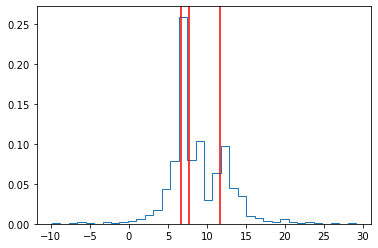

In [17]:
q25,q50,q75 = np.percentile(data, [25,50,75])

from astropy.visualization.hist import hist as fancyhist
_ = fancyhist(data, bins="scott", histtype="step",density=True)
plt.axvline(q25, color = 'r') #line at 25th percentile (e.g., by giving an x,y pair)
plt.axvline(q50, color = 'r') #line at 50th percentile
plt.axvline(q75, color = 'r') #line at 75th percentile

The **mode** is the most probable value, determined from the peak of the distribution, which is the value where the derivative is 0:
$$ \left(\frac{dh(x)}{dx}\right)_{x_m} = 0$$

Another way to estimate the mode (at least for a Gaussian distribution) is
$$x_m = 3q_{50} - 2\mu$$

In [18]:
import scipy
# Execute this cell  (note that data is not Gaussian so these are very different!)
mode = scipy.stats.mode(data)
modealt = 3*q50 - 2*mean
print(mode)
print(modealt)

# Note: don't rely on scipy.stats.mode()
# It gives the most common value of an array, 
# but we have a random sample of unique draws

ModeResult(mode=array([-9.89016755]), count=array([1]))
5.668374641327581


Some care is needed here as [scipy.stats.mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) actually gives the wrong answer above.  Each value in our distribution is unique and only appears once.  Basically, in trying to determine the mode in this way we are thinking of the distribution as a histogram, but it is really more like the "rug plot" we made last time.  We won't get in to how to deal with that, so just be aware of the potential problem here. 

Other useful **shape** measures include the "higher order" moments (the **skewness** and **kurtosis**):

$$\Sigma = \int_{-\infty}^{\infty}  \left(\frac{x-\mu}{\sigma}\right)^3 h(x) dx,$$

$$K = \int_{-\infty}^{\infty}  \left(\frac{x-\mu}{\sigma}\right)^4 h(x) dx  - 3.$$

Where the skewness is a measure of how asymmetric your data is and kurtosis how peaked or flat topped it is.


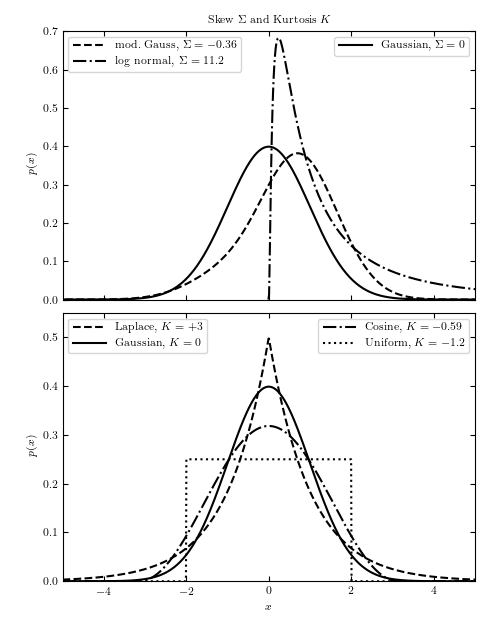

In [19]:
# Execute this cell
skew = scipy.stats.skew(data)
kurt = scipy.stats.kurtosis(data)
print(skew,kurt)

0.45629831452599 3.24867718616583


In [20]:
# Excute this cell
# Summary descriptive statistics for our distribution
print("Location: ", mean, median, mode)
print("Scale: ", var, std, astroMLstats.sigmaG(data))
print("Shape: ", skew, kurt)
print("Some percentiles: ", q25, q50, q75)

Location:  8.79491032639886 7.752731764708434 ModeResult(mode=array([-9.89016755]), count=array([1]))
Scale:  15.026052739760294 3.876345281287555 3.678746989540611
Shape:  0.45629831452599 3.24867718616583
Some percentiles:  6.674995612577169 7.752731764708434 11.637549888596837


We could do the same calculation of basic statistics with a normal (Gaussian) distribution with a pdf given by:
 $$\frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

In [21]:
# Complete with a mean, stddev, and array size of your choice.  E.g., 0, 1, and 10000.
# Then execute this cell
#
# loc = mean (mu)
# scale = stddev (sigma)
ndata = np.random.normal(loc=10,scale=1,size=10000)

In [22]:
# Compute all the above stats for this distribution
print(np.mean(ndata), np.median(ndata), np.var(ndata), np.std(ndata))
print(scipy.stats.skew(ndata), scipy.stats.kurtosis(ndata), scipy.stats.mode(ndata).mode)
print(np.percentile(ndata, [25,50,75]))

9.980532811053115 9.995326996305932 0.9841152115117607 0.9920258119180976
-0.029494566931698402 -0.026278345319398433 [6.23897599]
[ 9.31091352  9.995327   10.65486331]


### Sample vs. Population Statistics 

Statistics estimated from the *data* are called **sample statistics** as compared to **population statistics** which come from knowing the functional form of the pdf.  Up to now we have been computing population statistics.

Specifically, $\mu$ is the *population average*, i.e., it is the expecation value of $x$ for $h(x)$.  But we don't *know* $h(x)$.  The **sample mean**, $\overline{x}$, is an *estimator* of $\mu$, defined as
$$\overline{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i,$$
which we determine from the data itself.

Then instead of $\sigma^2$, which is the **population variance**, we have the **sample variance**, $s^2$, where

$$s^2 = \frac{1}{N-1}\sum_{i=1}^N(x_i-\overline{x})^2$$

Where it is $N-1$ instead of $N$ since we had to determine $\overline{x}$ from the data instead of using a known $\mu$.  Ideally one tries to work in a regime where $N$ is large enough that we can be lazy and ignore this. 

So the mean and variance of a distribution are $\mu$ and $\sigma^2$.  The **estimators** of the distribution are $\overline{x}$ (or $\hat{x}$) and $s^2$.

### Bias

If there is a difference between the *estimator* and the *population* values, we say that the estimator is **biased** (perhaps not quite the usage of the word that you are used to).  E.g., if your distribution is Gaussian and $\overline{x}$ is a biased estimator of $\mu$, then the Gaussian model is not centered in the right place.

More on this later.

### Uncertainty

We would also like to know the uncertainty of our estimates $\overline{x}$ and $s$.  Note that $s$ is **NOT** the uncertainty of $\overline{x}$.  Rather $s$ is telling us something about the width of our distribtion.  The uncertainty of $\overline{x}$, $\sigma_{\overline{x}}$ is 
$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$
which we call the **standard error of the mean**.  So, the accuracy to which we know the mean is smaller than the width of the distribution.

The uncertainty of $s$ itself is
$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$

Note that for large $N$, $\sigma_{\overline{x}} \sim \sqrt{2}\sigma_s$ and for small $N$, $\sigma_s$ is not much smaller than $s$.

Another useful uncertainty estimate is for computing quantiles. The **standard error of a quantile** is

$$ \sigma_{q_p} = \frac{1}{h_p}\sqrt{\frac{p(1-p)}{N}}$$

where $p$ is between $0$ and $1$.  

### A note on uncertainties and errors

* Technically, **errors** are systematic **biases** that we cannot mitigate through collecting lots and lots of data. 
* Statistical **uncertainties** are the result of random measurement uncertainty. 
* But "error" will be used for both, and denoted as either statistical errors (error bars) or systematic errors (biases).


* Statistical error distributions (error bars) that vary from data point to data point are called **heteroscedastic errors**. If they are the same for all points then they are **homoscedastic errors**.

That's a quick review of how to compute some basic statistics of a distribution.  

Next time we'll start talking about distributions themselves, which represent the probability as a function of the independent variable. So, let's talk about probability and introduce Bayes' Rule.

## Probability <a class="anchor" id="three"></a>

> $p(A)$ = the probability of $A$ (or the probability density at $A$).

The probability of $A$, $p(A)$, is the probability that some event will happen (say a coin toss coming up tails), or if the process is continuous, the probability of $A$ falling in a certain range.  (N.B., Technically these two things are different and sometimes are indicated by $P$ and $p$, but I'm ignoring that here.)  $p(A)$ must be positive definite for all $A$ and the sum/integral of the pdf must be unity.

If we have two events, $A$ and $B$, the possible combinations are illustrated by the following figure:
![Figure 3.1](http://www.astroml.org/_images/fig_prob_sum_1.png)

$A \cup B$ is the **union** of sets $A$ and $B$.  **Read as A OR B.**

$A \cap B$ is the **intersection** of sets $A$ and $B$.  **Read as A AND B.**

The probability that *either* $A$ or $B$ will happen (which could include both) is the *union*, given by

$$p(A \cup B) = p(A) + p(B) - p(A \cap B)$$

The figure makes it clear why the last term is necessary.  Since $A$ and $B$ overlap, we are double-counting the region where *both* $A$ and $B$ happen, so we have to subtract this out.  

The probability that *both* $A$ and $B$ will happen, $p(A \cap B)$, can be written as
$$p(A \cap B) = p(A|B)p(B) = p(B|A)p(A)$$

where p(A|B) is the probability of A *given that* B is true and is called the **conditional probability**.  So the $|$ is short for "given that".

The **law of total probability** says that

$$p(A) = \sum_ip(A|B_i)p(B_i)$$

Example:

    A = hit head on door frame, B = { is tall, is average, is short }
    P(A) = P(A|is tall) + P(A|is average) + P(A|is short)

N.B.  Just to be annoying, different people use different notation and the following all mean the same thing
$$p(A \cap B) = p(A,B) = p(AB) = p(A \,{\rm and}\, B)$$

I'll use the comma notation as that is what the book uses.  So, read the comma like **AND**.

It is important to realize that the following is *always* true
$$p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

However, if $A$ and $B$ are independent, then 

$$p(A,B) = p(A)p(B)$$

Example:

     Vera is successful and Vera is a Libra.
     
In other words, knowing A happened tells us nothing about whether B happened (or will happen), and vice versa.

### Example (classic marbles in bag scenario)

If you have a bag with 5 marbles (3 yellow and 2 blue), and you want to know the probability of picking 2 yellow marbles in a row, that would be

$$p(Y_1,Y_2) = p(Y_2|Y_1)p(Y_1).$$

$p(Y_1) = \frac{3}{5}$ since you have an equally likely chance of drawing any of the 5 marbles.

If you did not put the first marble back in the back after drawing it (sampling *without* **replacement**), then the probability
$p(Y_2|Y_1) = \frac{2}{4}$, so that
$$p(Y_1,Y_2) = \frac{3}{5}\frac{2}{4} = \frac{3}{10}.$$

But if you put the first marble back, then
$p(Y_2|Y_1) = \frac{3}{5} = p(Y_2)$, so that 
$$p(Y_1,Y_2) = \frac{3}{5}\frac{3}{5} = \frac{9}{25}.$$

In the first case $A$ and $B$ (or rather $Y_1$ and $Y_2$) are *not* independent, whereas in the second case they are.

We say that two random variables, $A$ and $B$ are independent *iff*
$p(A,B) = p(A)p(B)$
such that knowing $B$ does not give any information about $A$.

Here is a more complicated example from 
[Jo Bovy's class at UToronto](http://astro.utoronto.ca/%7Ebovy/teaching.html)
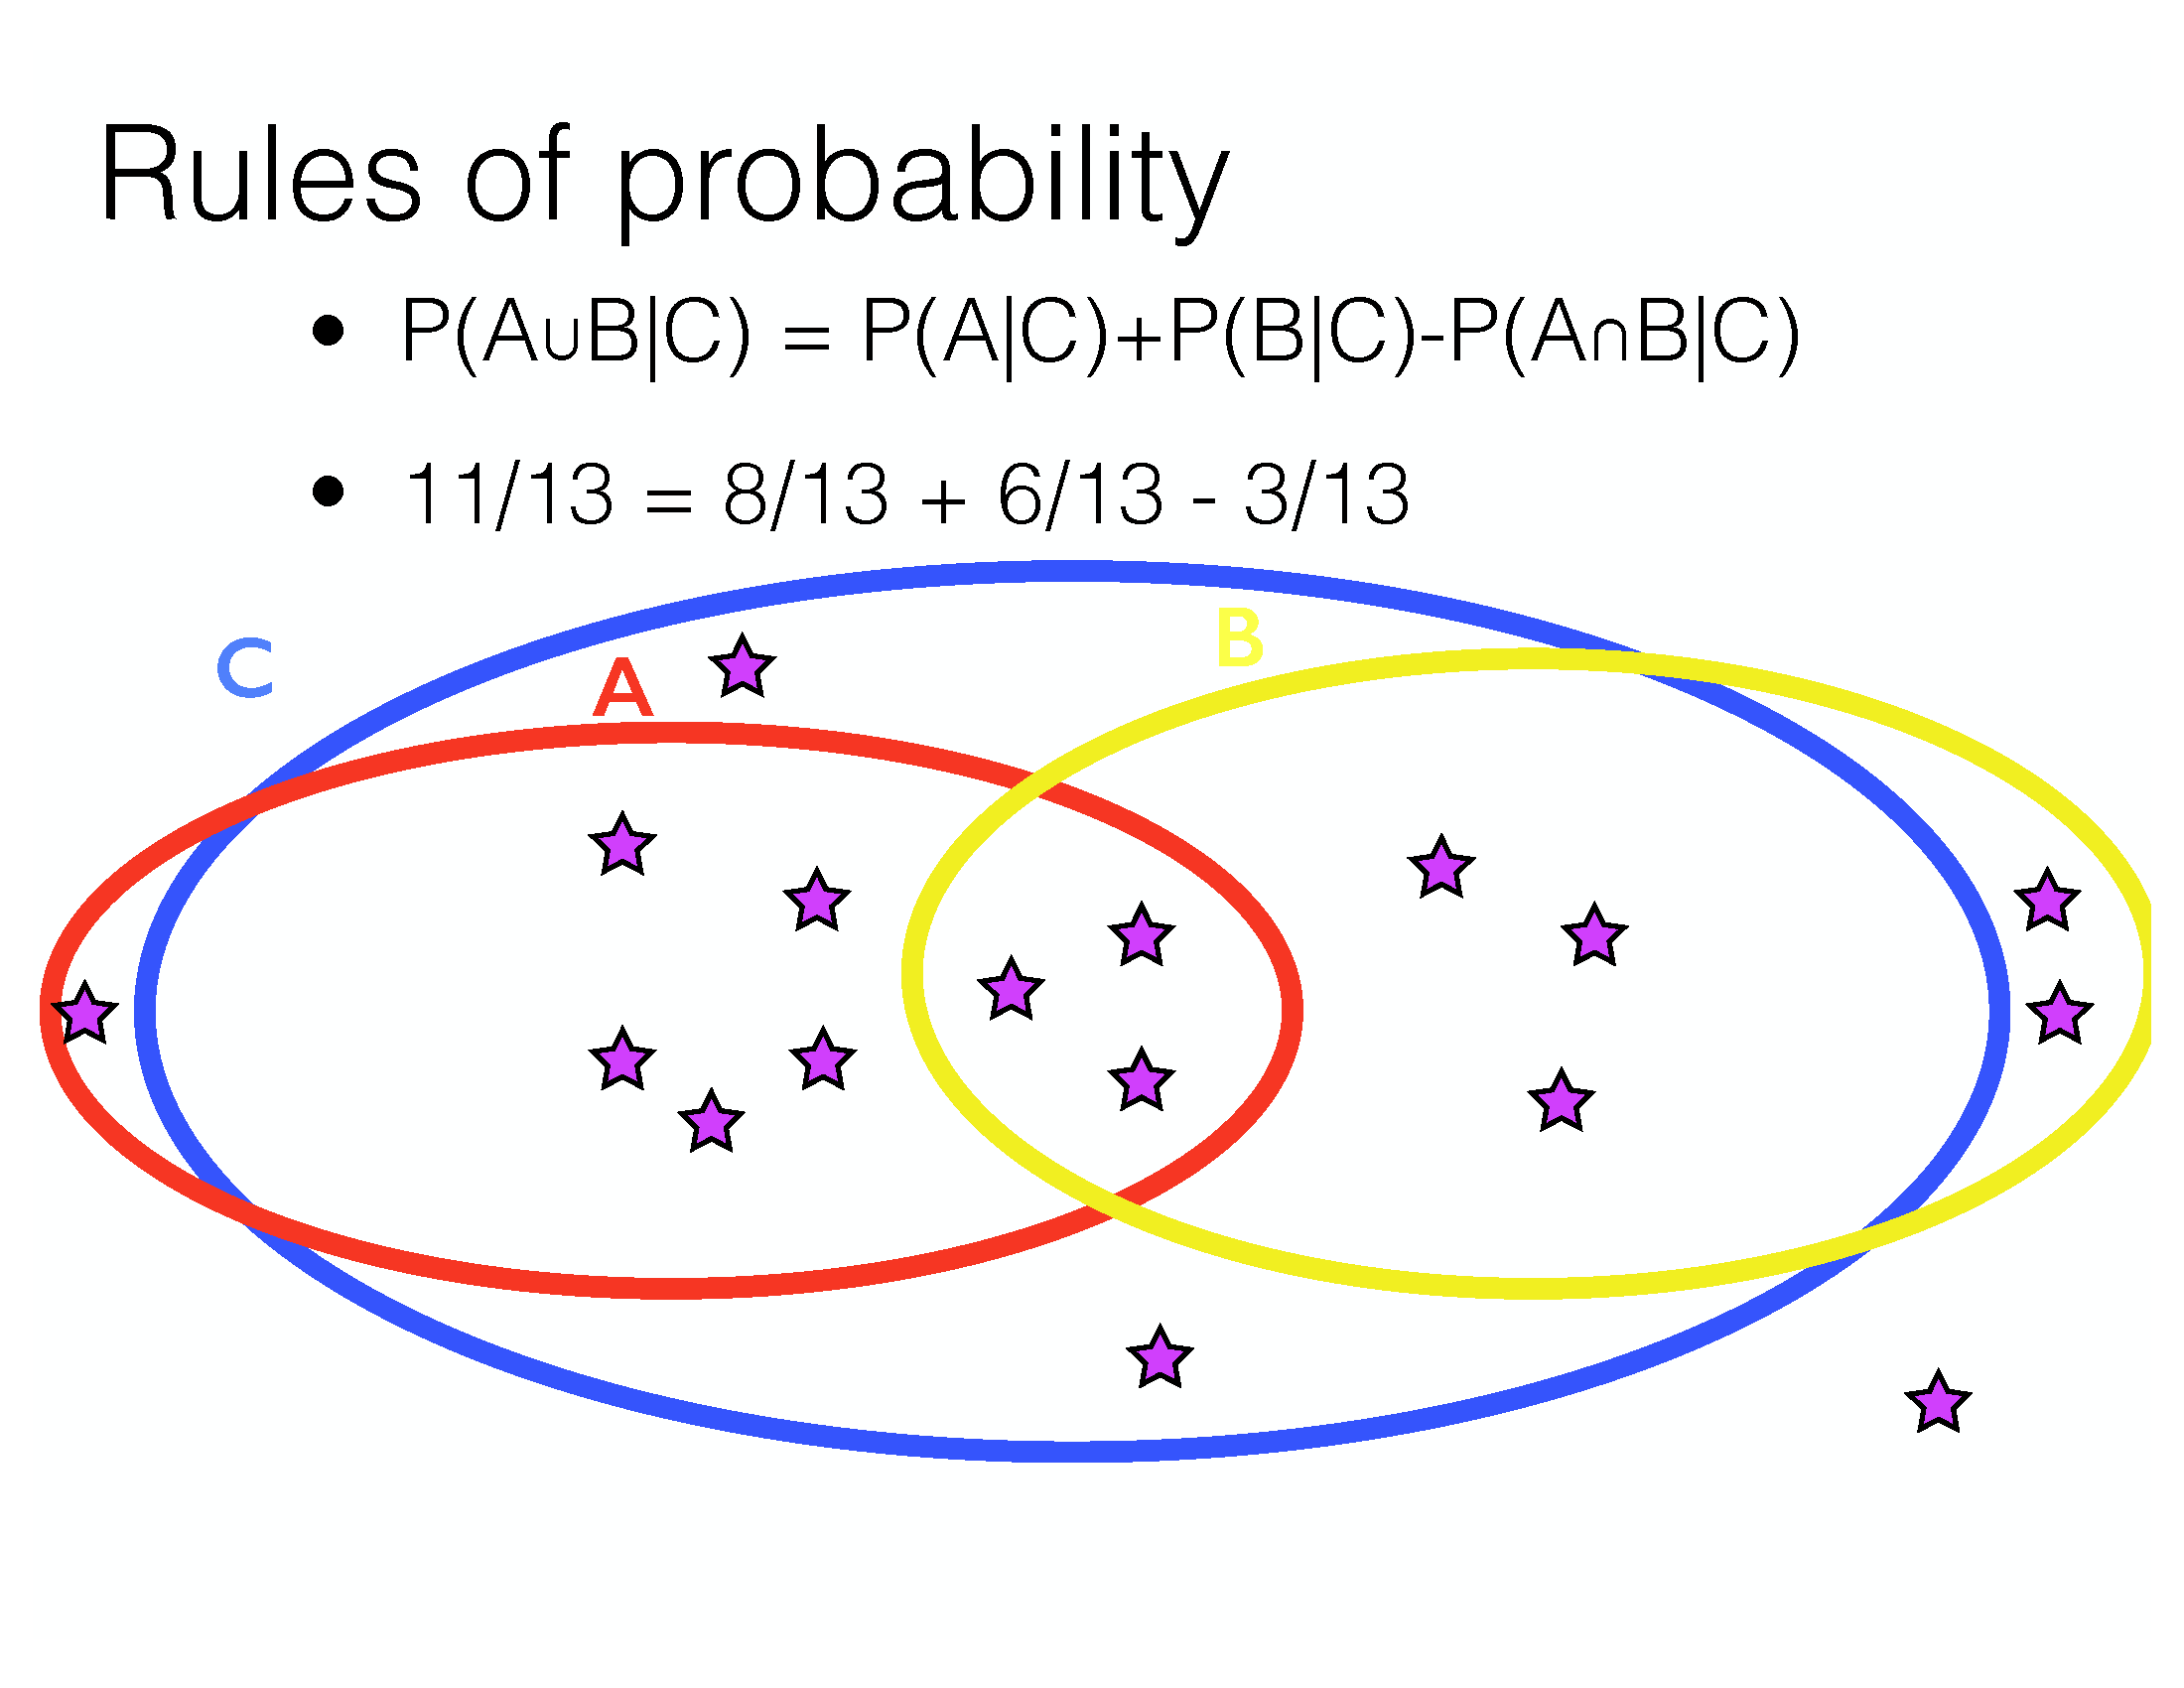

So
$$p(A \,{\rm or}\, B|C) = p(A|C) + p(B|C) - p(A \, {\rm and}\, B|C)$$

We could get even more complicated than that, but let's leave it there for now as this is all that we need right now.

Need more help with this?  Try watching some Khan Academy videos and working through the exercises:
[https://www.khanacademy.org/math/probability/probability-geometry](https://www.khanacademy.org/math/probability/probability-geometry)

[https://www.khanacademy.org/math/precalculus/prob-comb](https://www.khanacademy.org/math/precalculus/prob-comb)

## Bayes' Theorem <a class="anchor" id="four"></a>

We have that 
$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We can define the ***marginal probability*** as
$$p(x) = \int p(x,y)dy,$$
where marginal means essentially projecting on to one axis (integrating over the unwanted variable).

We can re-write this as
$$p(x) = \int p(x|y)p(y) dy$$

This is just the law of total probability (as defined above), but for continous variables.

An illustration might help.  In the following figure, we have a 2-D distribution in $x-y$ parameter space.  Here $x$ and $y$ are *not* independent as, once you pick a $y$, your values of $x$ are constrained.

The **marginal** distributions are shown on the left and bottom sides of the left panel.  As the equation above says, this is just the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).  

The three panels on the right show the **conditional probability** (of $x$) for three $y$ values: $p(x|y=y_0)$.  These are just "slices" through the 2-D distribution.

![http://www.astroml.org/_images/fig_conditional_probability_1.png](http://www.astroml.org/_images/fig_conditional_probability_1.png)


Since $p(x|y)p(y) = p(y|x)p(x)$ we can write that
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$
which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' Theorem**, which itself is not at all controverial, though its application can be as we'll discuss later.

If you don't have the book, I'd definitely recommend finding some online source to help make sure that you understand the basic concepts of **conditional probability**.  For example the first two Khan Academy lessons from [https://www.khanacademy.org/math/ap-statistics/probability-ap#stats-conditional-probability](https://www.khanacademy.org/math/ap-statistics/probability-ap#stats-conditional-probability).

## Example: Lego's  <a class="anchor" id="five"></a>

An example with Lego's (it's awesome):
[https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego)

## Example: Monty Hall Problem

You are playing a game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick), making sure to select one with a goat.  The host offers you the opportunity to switch doors.  Do you?

![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

Now you are back at the 2 door situation.  But what can you make of your prior information? Let's break this down.

* Probability of car behind **Door 1** $= 1/3$
* Probability of car behind **Doors 2 or 3** $= 2/3$

But if the host opens **Door 3** to show a goat, you now have prior information to update your probability of the car being behind **Door 2**. The probability of the car behind **Door 1** is still $1/3$, but the total probability must sum to unity, and you only have **Door 2** left. Hence,

* With prior knowledge of **Door 3** containing a goat, the probability of car behind **Door 2** $=2/3$.


So, ***switching doubles your chances***. You should always switch!! But only because you had prior information.  If someone walked in after the "bad" door was opened, then their probability of winning is the expected $1/2$.

Try it:
https://betterexplained.com/articles/understanding-the-monty-hall-problem/

This example is easier to understand if you do the same thing, but start with a much larger number of doors.

For $N$ choices, revealing $N-2$ "answers" doesn't change the probability of your choice.  It is still $\frac{1}{N}$.  But it *does* change the probability of your knowledge of the *other* remaining choice by $N-1$ and it is $\frac{N-1}{N}$. Therefore, by switching, you increase your chance of winning by a factor of $(N-1)$. Shocking, but true. 

* In the 3-door example, switching doubles your chance of winning (from $1/3$ to $2/3$). 
* In a 100-door example, switching increases your chance of winning by a factor of $99$.

This is an example of the use of *conditional* probability, where we have $p(A|B) \ne p(A)$.



## Contingency Tables  <a class="anchor" id="six"></a>

We can also use Bayes' rule to learn something about false positives and false negatives.

Let's say that we have a test for a disease.  The test can be positive ($T=1$) or negative ($T=0$) and one can either have the disease ($D=1$) or not ($D=0$).  So, there are 4 possible combinations:
$$T=0; D=0 \;\;\;  {\rm true \; negative}$$
$$T=0; D=1 \;\;\; {\rm false \; negative}$$
$$T=1; D=0 \;\;\; {\rm false \; positive}$$
$$T=1; D=1 \;\;\; {\rm true \; positive}$$

All else being equal, you have a 50% chance of being misdiagnosed.  Not good!  But the probability of disease and the accuracy of the test presumably are not random.

If the rates of false positive and false negative are:
$$p(T=1|D=0) = \epsilon_{\rm FP}$$
$$p(T=0|D=1) = \epsilon_{\rm FN}$$

then the true negative and true positive rates are just:
$$p(T=0| D=0) = 1-\epsilon_{\rm FP}$$
$$p(T=1| D=1) = 1-\epsilon_{\rm FN}$$

Let's assume that $\epsilon_{\rm FP}=0.02$ and $\epsilon_{\rm FN}=0.001$. 

In graphical form this is:
![http://www.astroml.org/_images/fig_contingency_table_1.png](http://www.astroml.org/_images/fig_contingency_table_1.png)

If we have a **prior** regarding how likely the disease is, we can take this into account.

$$p(D=1)=\epsilon_D$$

and then $p(D=0)=1-\epsilon_D$. Say, $\epsilon_D = 0.01$. 

Now assume that a person tested positive. What is the probability that this person has the disease?

We can't just read $p(D=1|T=1)$ off the table.  That's because the table entry is the conditional probability of the *test* given the *data*, $p(T=1|D=1)$, what we want is the conditional probability of the *data* given the *test*.

Bayes' rule then can be used to help us determine how likely it is that you have the disease if you tested positive:

$$p(D=1|T=1) = \frac{p(T=1|D=1)p(D=1)}{p(T=1)},$$

where $$p(T=1) = p(T=1|D=0)p(D=0) + p(T=1|D=1)p(D=1).$$

So
$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} \approx \frac{\epsilon_D}{\epsilon_D+\epsilon_{FP}}$$

That means that to get a reliable diagnosis, we need $\epsilon_{FP}$ to be quite small.  (Because you *want* the probability to be close to unity if you test positive, otherwise it is a *false* positive).

In our example with a disease rate of 1% ($\epsilon_D = 0.01$) and a false positive rate of 2% ($\epsilon_{\rm FP}=0.02$), we have 

$$p(D=1|T=1) = \frac{0.01}{0.01+0.02} = 0.333$$

Then in a sample of 1000 people, 10 people will *actually* have the disease $(1000*0.01)$, but another 20 $(1000*0.02)$ will test positive, despite being healthy!

Therefore, in that sample of 30 people who tested positive, only 1/3 have the disease (not 98% or 99.9% as you might have expected!).

For COVID-19, in Fall of 2020 there were positive rates of 0.1% to 1% and false negative rates of 10-20%.  For example, see [https://www.spectator.co.uk/article/how-many-covid-diagnoses-are-false-positives-](https://www.spectator.co.uk/article/how-many-covid-diagnoses-are-false-positives-)

In Philadelphia there were 2280 cases per 100000 people or 2.28%; see [https://www.nytimes.com/interactive/2020/us/pennsylvania-coronavirus-cases.html](https://www.nytimes.com/interactive/2020/us/pennsylvania-coronavirus-cases.html).  However, that's the total over over 6 months, so it was more like 0.2% at any given time.

Plugging in the worst of those numbers ($\epsilon_{\rm FP}=0.01$, $\epsilon_{\rm FN}=0.20$, $\epsilon_D = 0.002$), I get 
$$p(D=1|T=1) = \frac{0.0016}{0.0016+0.00998} = 0.138$$
just 13.8%!  So if you tested positive, you didn't necessarily have the disease!  However, that is driven entirely by the false positive rate.  If the kind of test you took had a rate that is 10 times better, then you would have had a 62% chance of actually being positive.  Not bad, but not the 99.9% that you were thinking.

What about if you tested negative, what is the probability that you were indeed negative?
$$p(D=0|T=0) = \frac{0.98802}{0.98802+0.0016} = 0.9984$$
which is a 99.8% chance -- a much better track record!  That's largely driven by the relatively low indicence of the disease.  

What if someone you had been in close contact with was known to be positive?  Let's say that the disease rate is now 50% (if not higher):
$$p(D=0|T=0) = \frac{0.495}{0.495+0.4} = 0.553.$$
In that case, you were only 55.3% certain that you are actually negative.

## Models and Data <a class="anchor" id="seven"></a>

In this class, we generally won't be dealing with the probability of events $A$ and $B$, rather we will be dealing with models and data, where we are trying to determine the model, given the data.  So, we can rewrite Bayes' rule as
$$p({\rm model}|{\rm data}) = \frac{p(\rm{data}|\rm{model})p(\rm{model})}{p(\rm{data})}.$$

We can write this in words as:
$${\rm Posterior Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}},$$

where we interpret the posterior probability as the probability of the model (including the model parameters).

We'll talk more about models next time.

#### Exit Ticket:  

Submit this notebook with the code cells completed (including the one cell with blanks).
    
**Add a screen shot showing your results after playing the Monty Hall game above 10 times.**    You can insert an image in jupyter by clicking "Edit", then "Insert Image" down at the bottom.  Run the cell to get the image to appear.

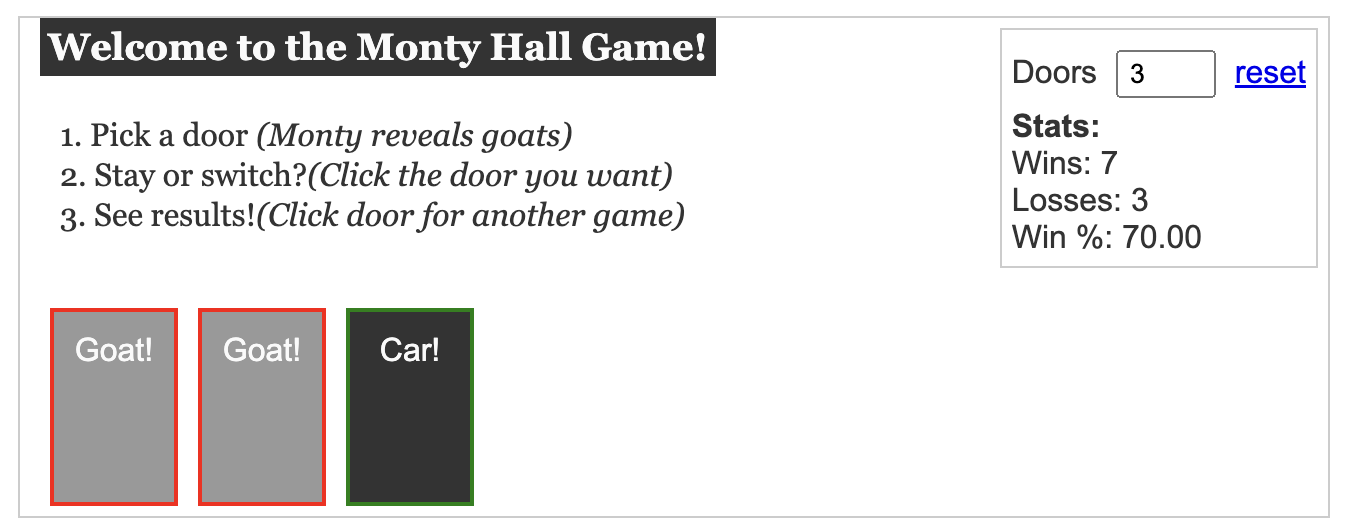